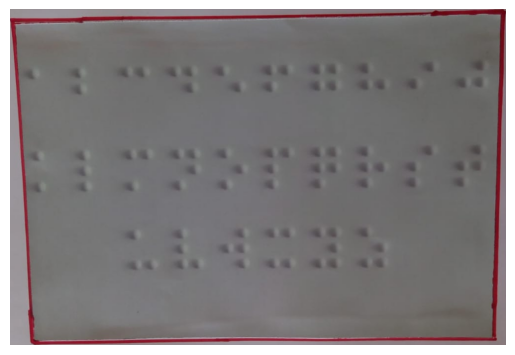

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 
def crop_box(image_path):
    # Load the image
    image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Canny edge detection
    edges = cv2.Canny(gray, threshold1=50, threshold2=150, apertureSize=3)

    # Find contours in the edge-detected image
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Find the largest contour (assuming it's the box)
    if contours:
        largest_contour = max(contours, key=cv2.contourArea)

        # Get the bounding rectangle around the largest contour
        x, y, w, h = cv2.boundingRect(largest_contour)

        # Crop the region of the box
        cropped_image = image[y:y + h, x:x + w]

        return cropped_image

# Example usage:
image_path = "box.jpg"
cropped_result = crop_box(image_path)
plt.imshow(cv2.cvtColor(cropped_result , cv2.COLOR_BGR2RGB))
plt.axis('off')  # Turn off the axis labels and ticks
plt.show()
# You can now use the cropped_result for further processing or display


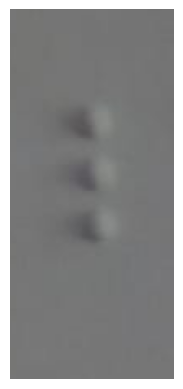

In [4]:
import cv2
import os

def extract_sub_images(input_image_path, num_rows, num_cols):
    # Load the image
    image = input_image_path
    
    # Calculate the height and width of the image
    height, width, _ = image.shape
    
    # Define custom row heights (adjust as needed)
    row_heights = [height // num_rows] * num_rows
    
    # Create a list to store individual boxes
    boxes = []

    for i in range(num_rows):
        y1 = sum(row_heights[:i])
        y2 = sum(row_heights[:i + 1])

        for j in range(num_cols):
            x1 = j * (width // num_cols)
            x2 = (j + 1) * (width // num_cols)

            box = image[y1:y2, x1:x2]
            boxes.append(box)

    return boxes

# Example usage of the function
input_image_path = cropped_result
num_rows = 3
num_cols = 10

sub_images = extract_sub_images(input_image_path, num_rows, num_cols)
plt.imshow(cv2.cvtColor(sub_images[11] , cv2.COLOR_BGR2RGB))
plt.axis('off')  # Turn off the axis labels and ticks
plt.show()

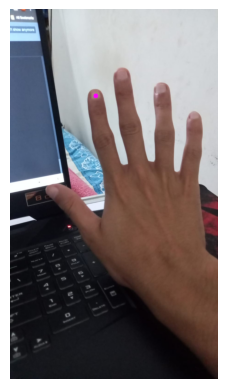

In [3]:
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt

def detect_and_highlight_index_finger_tip(image_path):
    # Initialize Mediapipe Hand module
    mp_hands = mp.solutions.hands
    hands = mp_hands.Hands()

    # Read the input image
    image = cv2.imread(image_path)

    # Convert the image to RGB format (Mediapipe requires RGB input)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Process the image to detect hands
    results = hands.process(image_rgb)

    # Check if hands were detected
    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            # Extract the coordinates of the index finger tip
            index_finger_tip = hand_landmarks.landmark[8]

            # Convert the normalized coordinates to pixel coordinates
            height, width, _ = image.shape
            x, y = int(index_finger_tip.x * width), int(index_finger_tip.y * height)

            # Draw a circle at the index finger tip (pink color)
            cv2.circle(image, (x, y), 10, (255, 0, 255), -1)  # Pink circle

    return image

# Example usage:
image_path = 'hand.jpg'
processed_image = detect_and_highlight_index_finger_tip(image_path)
plt.imshow(cv2.cvtColor(processed_image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Turn off the axis labels and ticks
plt.show()


In [4]:
import cv2
import numpy as np

# Function to detect the color pink in an image
def detect_pink_color(image):
    # Read the image
    image = image

    # Define the lower and upper bounds for the pink color in HSV color space
    lower_pink = np.array([150, 50, 50])  # Lower bound (pink)
    upper_pink = np.array([170, 255, 255])  # Upper bound (pink)

    # Convert the image to the HSV color space
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Create a mask to detect the pink color within the specified range
    pink_mask = cv2.inRange(hsv, lower_pink, upper_pink)

    # Count the number of pink pixels in the image
    pink_pixel_count = np.count_nonzero(pink_mask)

    return pink_pixel_count > 0

# Example usage:
image_path = processed_image
pink_detected = detect_pink_color(image_path)

if pink_detected:
    print("Pink color is present in the image.")
else:
    print("Pink color is not present in the image.")


Pink color is present in the image.


In [5]:
from gtts import gTTS
import os

# Function to convert text to speech
def text_to_speech(text, output_file):
    try:
        # Create a gTTS object
        tts = gTTS(text)

        # Save the audio file
        tts.save(output_file)

        # Play the saved audio file (platform-specific)
        if os.name == 'posix':
            os.system(f'aplay {output_file}')  # Linux
        elif os.name == 'nt':
            os.system(f'start {output_file}')  # Windows

    except Exception as e:
        print(f"An error occurred: {e}")

if __name__ == "__main__":
    conversation_number = 1

    while True:
        user_input = input("Enter text (or 'exit' to quit): ")

        if user_input.lower() == 'exit':
            break

        output_file = f"conversation_{conversation_number}.mp3"
        text_to_speech(user_input, output_file)
        conversation_number += 1


Enter text (or 'exit' to quit): hi, welcome 
Enter text (or 'exit' to quit): hi welcome
Enter text (or 'exit' to quit): hi w,e,l,c,o,m,e
Enter text (or 'exit' to quit): tere leye he jeyaaa tujhe juno de deya
Enter text (or 'exit' to quit): mera muh meh lele
Enter text (or 'exit' to quit): exit
